# The case study: "No maximum at the R2-curve" 
## Author 
 Olga Krasotkina for MPI

## Problem statement
In some cases the PR2 curve is monotonic and has not any extremum and sugessts very large  optimal smoothness tending to the full stationary betas. 

## Source data

There are 12 indicies an 158 funds for 60 time points from 2015-03-29 till 2015-06-12. 


## Solution 1: Change the Leave-One-Out Procedure to Leave-Half-Out Procedure

* The proposed cross-validation procedure consist in two steps. At first step we throw out information about returns at moments $t = 1,3,...,T$, estimate the betas and fund return for these points. At the second  step we throw out the information about returns at the moments $t = 2,4,...,T$ and store the information about fund return at these points. The calculated PR2 error is more sensitive to chanfing smoothness value. 







## Import packages



In [2]:
import pandas as pd
import numpy as np
import scipy as sc
import Regress as nsr
import math
import matplotlib.pylab as plt
from datetime import datetime
%matplotlib notebook

## Import data




In [3]:
fund_data = pd.read_excel('SmoothnessData.xlsx','Sheet1')
assets_data = pd.read_excel('SmoothnessData.xlsx','Sheet2')
#assets_data

In [4]:
fundstbl = fund_data.iloc[2:62,0:158].values
assetstbl = assets_data.iloc[2:62,0:12].values
dates = assets_data.iloc[2:62].index.date
assetsall = np.mat(assetstbl)
fundsall = np.mat(fundstbl)
n = np.size(assetsall,1)
T = np.size(assetsall,0)
print(n)
print(T)

12
60


## A look at the returns

<IPython.core.display.Javascript object>


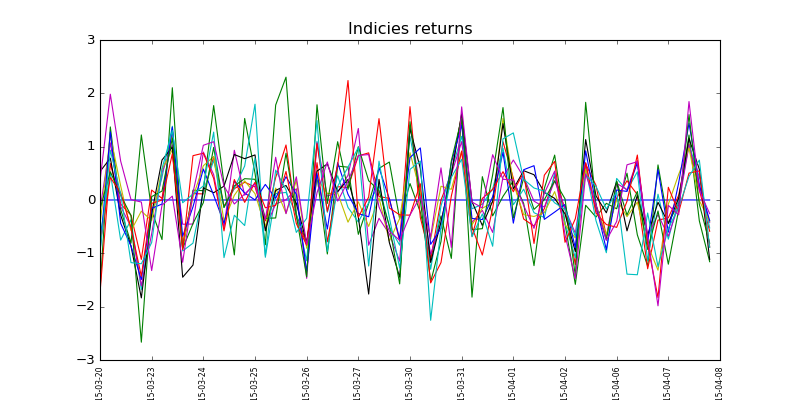

In [5]:
from matplotlib.ticker import MultipleLocator
majorLocator = MultipleLocator(5)






time =  range(T)
plt.figure(figsize=(10,5)) 
plt.title('Indicies returns')
plt.xticks(time, dates, rotation=90, size = 7)
ax = plt.gca()
ax.get_xaxis().set_tick_params(pad=5)


ax.get_xaxis().set_major_locator(majorLocator)

#plt.subplot(3,1,1)
for i in range(0,n):
    plt.plot(time, assetsall[:,i])
plt.show()

### Set parameters

In [6]:
# set smoothness
lam = 0.01

# fund
fnum = 0

# indicies
index_array = np.arange(12)
index_array = np.array([1,2,3,4,5,6,7,8,9,10,11])
#index_array = np.array([10,11])
print(index_array)
# set model matrix
dynamic_model = 0

[ 1  2  3  4  5  6  7  8  9 10 11]


## Leave one out procedure  for smoothness adjustment

In [1]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as pyplot
majorLocator = MultipleLocator(5)
n = np.size(assets,1)
T = np.size(assets,0)



outPoint = np.zeros([T,1])
fund = fundsall[:,fnum]/100
assets = assetsall[:,index_array]/100
lam_arr = []
lam = 0.01
while lam <=500:
    lam = lam*2
    lam_arr.append(lam)
band = 10

r2_lam_arr = []
r2_lam_t = np.zeros([len(lam_arr),T]) 
ilam = 0
for lam in lam_arr:
     r2_arr, r2_lam, fund_out = nsr.LeaveOneOut(assets,fund,lam,dynamic_model)
     r2_lam_t[ilam,:] = r2_arr.T 
     r2_lam_arr.append(r2_lam)
     ilam = ilam+1
    
#print  r2_lam_arr
plt.close("all")


plt.figure()
plt.subplot(2,1,1)
plt.title('Predicted R2 for different lambda ')
ax = plt.gca()
ax.set_xscale('log')
plt.plot(lam_arr,r2_lam_arr)

plt.subplot(2,1,2)
plt.title('Predicted R2 for different lambda at each time point')
for t in range(1,T-1):
    r2_t = r2_lam_t[:,t]
    plt.plot(lam_arr,r2_t)
ax = plt.gca()
ax.set_xscale('log')    

pyplot.matshow(r2_lam_t)


argminlam  = lam_arr[np.argmin(r2_lam_arr)]

beta_opt_lam, fund_est = nsr.nonstatRegress(assets,fund, argminlam, outPoint,dynamic_model)
plt.figure(figsize=(10,5))
title = 'Optimal betas by lam = ' + str(argminlam) 
plt.title(title)
for i in range(0,n):
    plt.plot(time, beta_opt_lam[:,i])
plt.xticks(time, dates, rotation=90, size = 7)
ax = plt.gca()
ax.get_xaxis().set_tick_params(pad=5)
ax.get_xaxis().set_major_locator(majorLocator)  
plt.show()

# Plot  return
plt.figure(figsize=(10,5))
plt.title('Fund Return ')
plt.xticks(time, dates, rotation=90, size = 7)
ax = plt.gca()
ax.get_xaxis().set_tick_params(pad=5)
ax.get_xaxis().set_major_locator(majorLocator)
plt.plot(time, fund, label = 'source')
plt.plot(time, fund_est, label = 'estimated')
plt.tight_layout() 

plt.show()

NameError: name 'np' is not defined

## Leave half out procedure  for smoothness adjustment

<IPython.core.display.Javascript object>


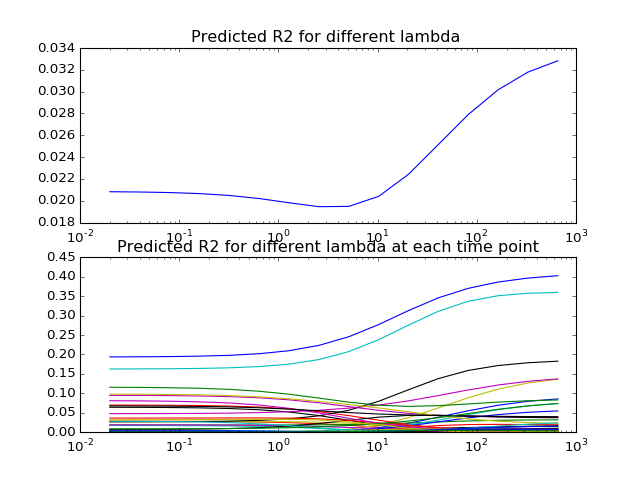

<IPython.core.display.Javascript object>


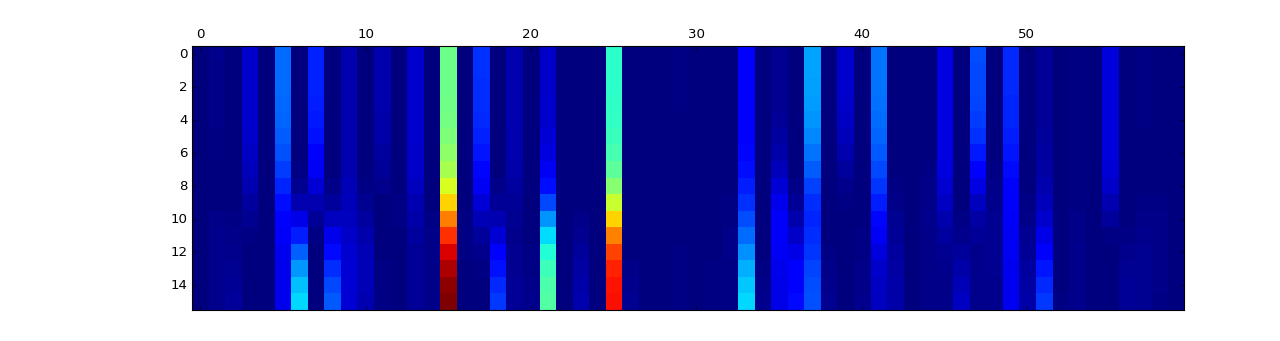

<IPython.core.display.Javascript object>


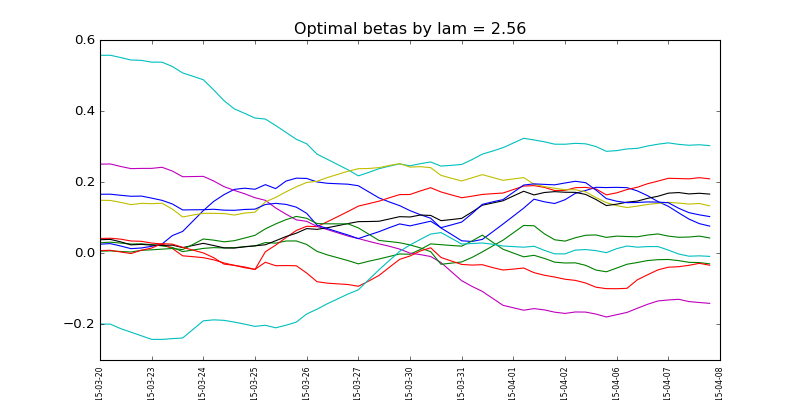

<IPython.core.display.Javascript object>


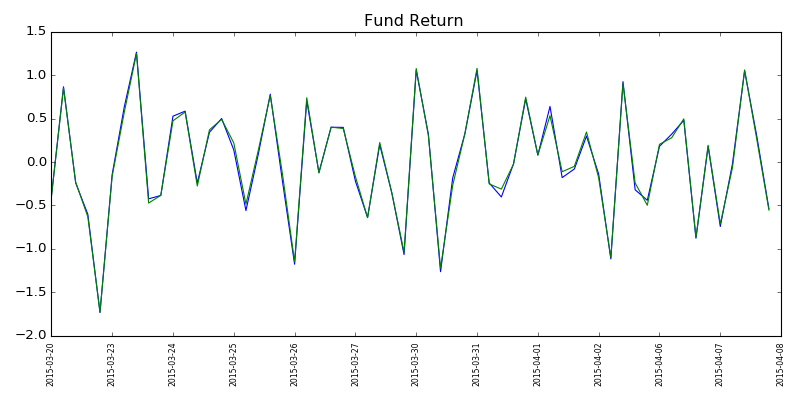

In [11]:
from matplotlib.ticker import MultipleLocator
majorLocator = MultipleLocator(5)


fund = fundsall[:,fnum]
assets = assetsall[:,index_array]
lam_arr = []
lam = 0.01
while lam <=500:
    lam = lam*2
    lam_arr.append(lam)
band = 10

r2_lam_arr = []

r2_lam_t = np.zeros([len(lam_arr),T]) 
ilam = 0
for lam in lam_arr:
     r2_arr, r2_lam, fund_out = nsr.LeaveHalfOut(assets,fund,lam,dynamic_model)
     r2_lam_t[ilam,:] = r2_arr.T    
     r2_lam_arr.append(r2_lam)
     ilam = ilam+1
#print  r2_lam_arr   
plt.close("all")


plt.figure()

plt.subplot(2,1,1)
plt.title('Predicted R2 for different lambda ')
ax = plt.gca()
ax.set_xscale('log')
plt.plot(lam_arr,r2_lam_arr)

plt.subplot(2,1,2)
plt.title('Predicted R2 for different lambda at each time point')
for t in range(1,T-1):
    r2_t = r2_lam_t[:,t]
    plt.plot(lam_arr,r2_t)
ax = plt.gca()
ax.set_xscale('log')    

pyplot.matshow(r2_lam_t)

argminlam  = lam_arr[np.argmin(r2_lam_arr)]

beta_opt_lam, fund_est = nsr.nonstatRegress(assets,fund, argminlam, outPoint,dynamic_model)
plt.figure(figsize=(10,5))
title = 'Optimal betas by lam = ' + str(argminlam) 
plt.title(title)
for i in range(0,n):
    plt.plot(time, beta_opt_lam[:,i])
plt.xticks(time, dates, rotation=90, size = 7)
ax = plt.gca()
ax.get_xaxis().set_tick_params(pad=5)
ax.get_xaxis().set_major_locator(majorLocator)  
plt.show()

# Plot  return
plt.figure(figsize=(10,5))
plt.title('Fund Return ')
plt.xticks(time, dates, rotation=90, size = 7)
ax = plt.gca()
ax.get_xaxis().set_tick_params(pad=5)
ax.get_xaxis().set_major_locator(majorLocator)
plt.plot(time, fund, label = 'source')
plt.plot(time, fund_est, label = 'estimated')
plt.tight_layout() 

plt.show()
